# Regression with Neural Networks with Tensorflow
Predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

2024-03-12 16:41:39.654015: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 16:41:39.658269: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 16:41:39.725865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 16:41:40.957508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.16.1'

## Creating data to view and fit

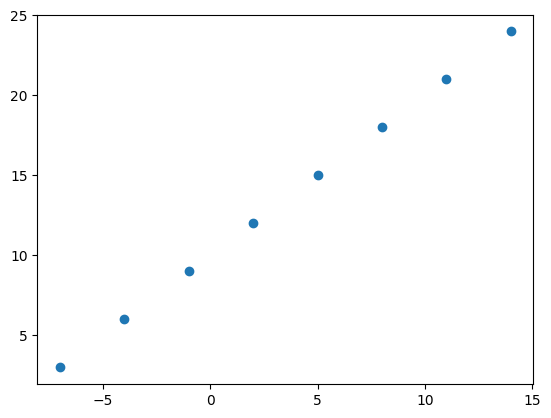

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize 
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

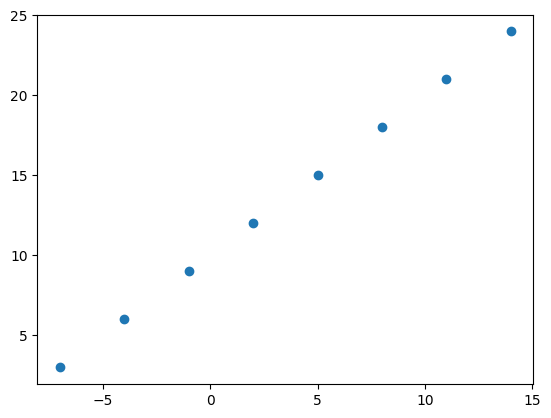

In [12]:
plt.scatter(X, y)

## Steps in modeling with tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define a loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learing) and evaluation metrics (what we can use to interpret the preformance of our model).
3. Fitting a model - letting the model try to find patterns between X and y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - loss: 11.1673 - mae: 11.1673
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.0348 - mae: 11.0348
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.9023 - mae: 10.9023
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.7698 - mae: 10.7698
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.6373 - mae: 10.6373


In [14]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[14.35525]], dtype=float32)

In [16]:
y_pred + 9.28

array([[23.63525]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. Creating a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - loss: 17.0793 - mae: 17.0793
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 16.7981 - mae: 16.7981
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 16.5168 - mae: 16.5168
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 16.2356 - mae: 16.2356
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 15.9543 - mae: 15.9543
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.6731 - mae: 15.6731
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.3918 - mae: 15.3918
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.1106 - mae: 15.1106
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.8562 - mae: 14.8562
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.7237 - mae: 14.7237
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14.5912 - mae: 14.5912
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14.4587 - mae: 14.4587
Epoch 13/100
1/1 ━━━━━━━

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[29.72115]], dtype=float32)

In [20]:
# Rebuild model adding a hidden layer in a model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 13.2063 - mae: 13.2063
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.5391 - mae: 12.5391
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.8765 - mae: 11.8765
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.2045 - mae: 11.2045
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.5164 - mae: 10.5164
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.8393 - mae: 9.8393
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.1399 - mae: 9.1399
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4096 - mae: 8.4096
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.6372 - mae: 7.6372
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8156 - mae: 6.8156
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.9368 - mae: 5.9368
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.9984 - mae: 4.9984
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [21]:
# Let's see prediction after adding a hidden layer
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[31.235077]], dtype=float32)

In [22]:
# Rebuild model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step - loss: 15.5071 - mae: 15.5071
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.6296 - mae: 14.6296
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 13.9547 - mae: 13.9547
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.2934 - mae: 13.2934
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.6403 - mae: 12.6403
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.9917 - mae: 11.9917
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.3441 - mae: 11.3441
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.6944 - mae: 10.6944
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.0397 - mae: 10.0397
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.3769 - mae: 9.3769
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.7031 - mae: 8.7031
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0153 - mae: 8.0153
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [23]:
model.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[26.685194]], dtype=float32)

### Learning rate is one of most important parameters in netural networks

## Evaluating a model

In practice, a typical workflow when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fir it -> evaluate it -> tweak a model -> ...

When it comes to evaluation **visualization** is important

It's good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does a model look like
* The training of a model - how does the model perform while it learns?
* The predictions of the model - how do predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

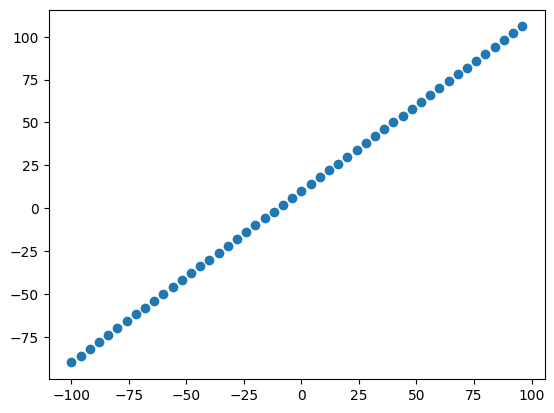

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

## The 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]  # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's vizualize it again

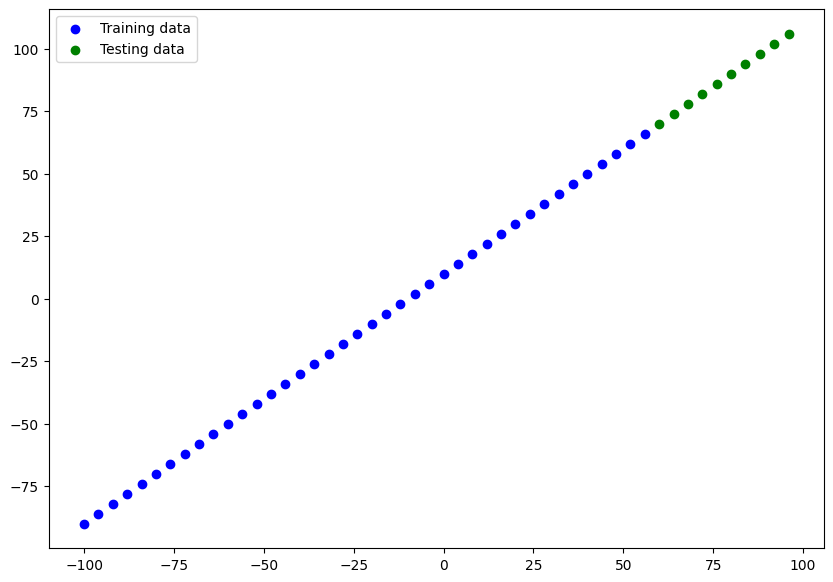

In [29]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend()


In [30]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [31]:
# Let's have a look how to build a neural network for our data

# Let's create a model which builds automatically by defining the input_shape argument in the first layer
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=[1]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

## Visualizing a model

In [32]:
# model.build() will throw ValueError: You must provide an `input_shape` argument. if not specified

model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during transfer learning)

In [33]:
# Fit a model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.9967 - mae: 37.4883  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.7851 - mae: 30.0765 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.3219 - mae: 22.4183 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.9567 - mae: 14.7102 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9073 - mae: 8.0555 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2932 - mae: 8.2222 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8991 - mae: 8.0087 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2417 - mae: 7.5524 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8893 - mae: 5.9214 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7344 - mae: 6.7280 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8358 - mae: 6.9144 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9220 - mae: 6.0501 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [34]:
from tensorflow.keras.utils import plot_model

# plot_model(model) doesn't work currently: AttributeError: module 'pydot' has no attribute 'InvocationException'

## Visualizing model's predictions

To visualize, it's a good idea to plot them against the grand truth labels.

Often it's seen in a form of 'y_test' or 'y_true' versus 'y_pred' (grand truth versus model predictions)

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[ 69.42624 ],
       [ 73.38408 ],
       [ 77.34193 ],
       [ 81.299774],
       [ 85.257614],
       [ 89.21544 ],
       [ 93.17329 ],
       [ 97.153175],
       [101.14298 ],
       [105.1328  ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [37]:
# Creating a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """ Plots training data, test data and compares it to grand truth """
    plt.figure(figsize=(10, 7))
    
    # Plot training data
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    
    # Plot testing data
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    
    # Plot model's predictions
    plt.scatter(test_data, predictions, c="y", label="Predictions")
    
    # Show a legend
    plt.legend()

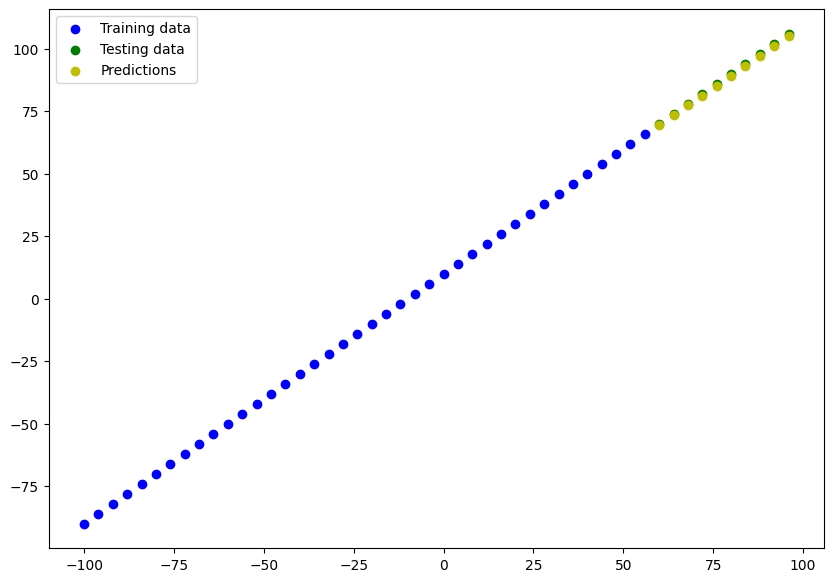

In [38]:
plot_predictions()

## Evaluting our model's predictions with regression evaluation metrics

Depending on the problem there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics are:
* MAE - mean absolute error, on average how wrong is each of my model's predictions
* MSE - mean square error, squre the average errors 

In [39]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.7473 - mae: 0.7473


[0.7472686767578125, 0.7472686767578125]

In [40]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 69.42624 ],
        [ 73.38408 ],
        [ 77.34193 ],
        [ 81.299774],
        [ 85.257614],
        [ 89.21544 ],
        [ 93.17329 ],
        [ 97.153175],
        [101.14298 ],
        [105.1328  ]], dtype=float32))

In [41]:
# Calculate the mean absolute error
def mae_loss(true_data, predictions):
    true_data = tf.cast(tf.squeeze(true_data), dtype=tf.float32)
    predictions = tf.cast(tf.squeeze(predictions), dtype=tf.float32)
    sum = 0
    tensor_range = len(true_data)
    for index in range(tensor_range):
        try:
            sum += abs(predictions[index] - true_data[index])
            
            # print(predictions[index])
            # print(true_data[index])
            # print(predictions[index] - true_data[index])
            # print(abs(predictions[index] - true_data[index]))
            # print()
            
        except Exception as error:
            return f"error occured: {error}"

    return sum / tensor_range

mae_loss(y_test, y_pred), tf.metrics.mean_absolute_error(tf.squeeze(y_test), tf.squeeze(y_pred))

(<tf.Tensor: shape=(), dtype=float32, numpy=0.7472687>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7472687>)

In [42]:
# Calculate mean square error
def mse_loss(true_data, predictions):
    true_data = tf.cast(tf.squeeze(true_data), dtype=tf.float32)
    predictions = tf.cast(tf.squeeze(predictions), dtype=tf.float32)
    sum = 0
    tensor_range = len(true_data)
    for index in range(tensor_range):
        try:
            sum += (true_data[index] - predictions[index]) ** 2

            # print(predictions[index])
            # print(true_data[index])
            # print(true_data[index] - predictions[index])
            # print((true_data[index] - predictions[index]) ** 2)
            # print()
        
        except Exception as error:
            return f"error occured: {error}"

    return sum / tensor_range

mse_loss(y_test, y_pred), tf.metrics.mean_squared_error(tf.squeeze(y_test), tf.squeeze(y_pred))

(<tf.Tensor: shape=(), dtype=float32, numpy=0.56856966>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5685698>)

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in data

**Note**: you may want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

In [43]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Let's do 3 modelling experiments

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. ...
5. ...

### Build model_1

In [44]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complile a model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 103.5059 - mae: 110.1149  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.5159 - mae: 74.9467 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.6646 - mae: 39.9032 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1442 - mae: 9.6553
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5076 - mae: 8.0109 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1286 - mae: 9.6437
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4872 - mae: 7.9930 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1131 - mae: 9.6321
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4668 - mae: 7.9752 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0975 - mae: 9.6205
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4465 - mae: 7.9573 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0819 - mae: 9.6088
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


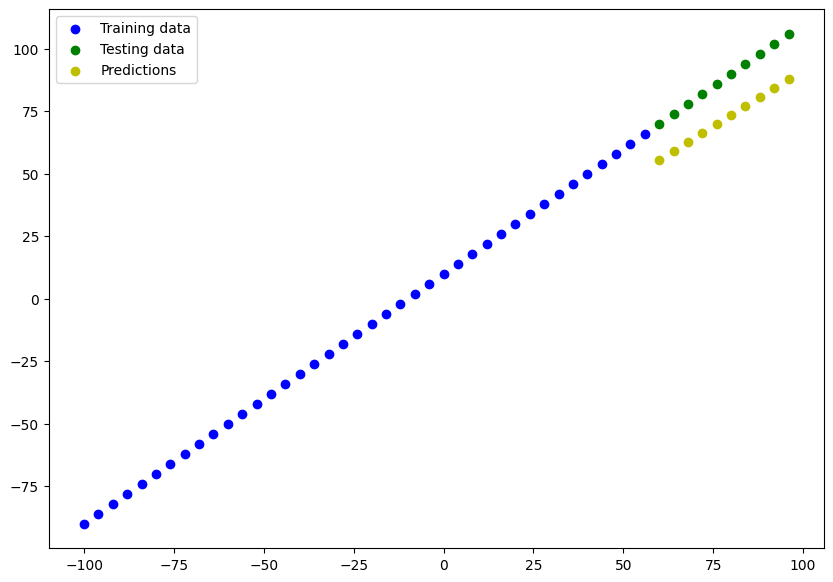

In [45]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [46]:
# Calculate model_1 evaluation metrics
mae_1 = mae_loss(y_test, y_preds_1)
mse_1 = mse_loss(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=16.19434>,
 <tf.Tensor: shape=(), dtype=float32, numpy=263.4997>)

### Build Model_2

In [47]:
# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit a model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.6784 - mae: 32.8235  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.3536 - mae: 25.2304 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.5793 - mae: 22.8753 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.9594 - mae: 22.4394 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8780 - mae: 13.6407 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.8188 - mae: 18.8246 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5161 - mae: 13.0174 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4531 - mae: 14.9540 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5296 - mae: 15.6536 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2867 - mae: 11.6420 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.9844 - mae: 14.5952 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.3505 - mae: 15.6131 
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


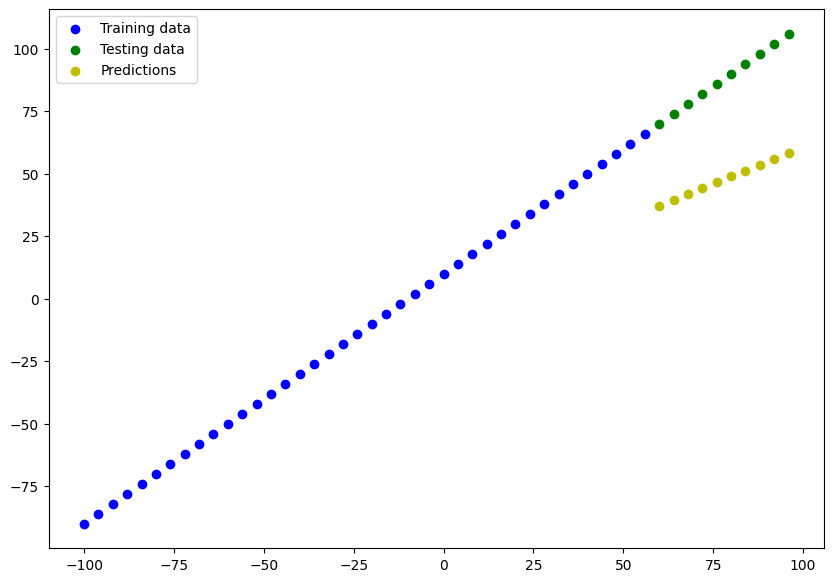

In [48]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [49]:
# Calculate model_2 evaluation metrics
mae_2 = mae_loss(y_test, y_preds_2)
mse_2 = mse_loss(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=40.267742>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1643.4951>)

### Build model_3

In [50]:
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit a model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.5755 - mse: 3120.3772  
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.5852 - mse: 1725.1212 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3252 - mse: 804.2772 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.7302 - mse: 532.0831 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.7359 - mse: 418.8398 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.3700 - mse: 363.6169 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.1205 - mse: 366.4409 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.5325 - mse: 222.9838 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.2110 - mse: 308.8375 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5057 - mse: 337.5057 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2744 - mse: 216.4662 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.0600 - mse: 307.0113 
Epoch 13/5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


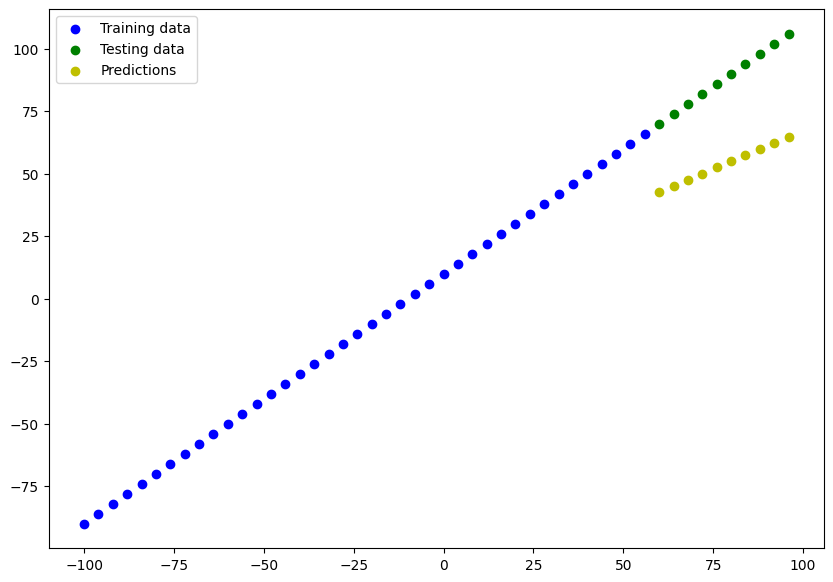

In [51]:
# Plot and make predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [52]:
# Calculate model_3 evaluation metrics
mae_3 = mae_loss(y_test, y_preds_3)
mse_3 = mse_loss(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.24458>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1193.028>)

## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [53]:
# Let's compare our models results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_2.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,16.194340,1643.495117
1,model_2,40.267742,1643.495117
2,model_3,34.244579,1193.027954


In [54]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63 (256.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Note:** one of the main goals should be to minimize time between your experiments. The more experiments you do, the more things you'll figure out that don't work and in turn you get closer to figuring out what does work. One should **experiment** a lot.

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

As you build models, you'll want to look into using:

* Tensorboard - a component of the TensorFlow library to help track modeling experiments
* Weights and Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving models

Saving our models allows to use them outside of the notebook (or wherever they were trained) such as in a web applications.

There are to main formats we can save our model's to:
1. The Keras format
2. The HDF5 format (legacy)

In [61]:
# Save model using SaveModel format
model_1.save('./saved_models/model_1.keras')

In [63]:
# Save model using HDF5 format
model_1.save('./saved_models/model_1.h5')

## Loading a saved model

In [65]:
# Load in keras format model
loaded_model_1 = tf.keras.models.load_model('./saved_models/model_1.keras')
loaded_model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4 (20.00 B)

In [66]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [68]:
# Compare model_1 predictions with keras format loaded model
model_1_preds = model_1.predict(X_test)
loaded_model_1_preds = loaded_model_1.predict(X_test)

model_1_preds == loaded_model_1_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
# load hdf5 format model
loaded_h5_model_1 = tf.keras.models.load_model("./saved_models/model_1.h5")
loaded_h5_model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [76]:
loaded_h5_model_1_preds = loaded_h5_model_1.predict(X_test)

model_1_preds == loaded_h5_model_1_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])